# Data Exploration and Cleaning

Following along with the code in the book, experimenting / adding my own notes.

In [1]:
example_list  = list(range(1,6))

In [2]:
example_list

[1, 2, 3, 4, 5]

In [3]:
example_list[:4] #all elements of the list with index up to, but not including 4

[1, 2, 3, 4]

In [4]:
example_list[0] = 'some text' # this will replace the 1st element with a string

In [5]:
example_list

['some text', 2, 3, 4, 5]

In [6]:
# making a dictionary
example_dict = {'apples':5, 'oranges':8} # curly braces

In [7]:
example_dict['apples'] # note that tab-completion works in jupyter

5

In [8]:
dict_to_list = list(example_dict)

In [9]:
dict_to_list

['apples', 'oranges']

In [10]:
dict_to_list = dict_to_list + ["pears","oranges","kiwis"] # appending

In [11]:
sorted(dict_to_list) # sorting alphabetically

['apples', 'kiwis', 'oranges', 'oranges', 'pears']

# data

 * http://bit.ly/2HIk5t3 which leads to
 * **LINK** https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/tree/master/Data
 * **DICTIONARY** https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients


In [12]:
import pandas as pd

In [13]:
# location of the .xls file (old)
file_location = r"C:\Users\Lappy\Data Science Projects with Python\00 data\default_of_credit_card_clients__courseware_version_1_21_19.xls"

## Here's what happened

I went to the github link, right clicked on the file in the list, and downloaded. It downloaded a 6kb file which had an .xls extension, but was not in fact an .xls file. I then went back to github, left clicked the link, and downloaded the raw file in github (icon at the top right). _That fixed the problem._

----------------------------

**note 1**  Now I'm getting a syntax error:


> This error occurs, because you are using a normal string as a path. You can use one of the three following solutions to fix your problem:

Just put `r` before your normal string. It converts a normal string to a raw string:

1: `pandas.read_csv(r"C:\Users\DeePak\Desktop\myac.csv")`

2: `pandas.read_csv("C:/Users/DeePak/Desktop/myac.csv")`

3: `pandas.read_csv("C:\\Users\\DeePak\\Desktop\\myac.csv")`

source - https://stackoverflow.com/a/46011113


**note 2** "ValueError: Excel file format cannot be determined, you must specify an engine manually."


> Also make sure you're using the correct pd.read_* method. I ran into this error when attempting to open a .csv file with read_excel() instead of read_csv(). I found this handy snippet here to automatically select the correct method by Excel file type.

```
if file_extension == 'xlsx':
    df = pd.read_excel(file.read(), engine='openpyxl')
elif file_extension == 'xls':
    df = pd.read_excel(file.read())
elif file_extension == 'csv':
    df = pd.read_csv(file.read())
```
 
source - https://stackoverflow.com/a/69339012



**note 3** The documentation for pandas says `xlrd` supports old-style Excel files `.xls`.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [14]:
file_location

'C:\\Users\\Lappy\\Data Science Projects with Python\\00 data\\default_of_credit_card_clients__courseware_version_1_21_19.xls'

In [15]:
csv_file_location = r"C:\Users\Lappy\Data Science Projects with Python\00 data\Chapter_1_cleaned_data.csv"

In [16]:
df = pd.read_csv(csv_file_location)

In [17]:
df.shape # this is the .csv version

(26664, 31)

In [18]:
df = pd.read_excel(file_location)

In [19]:
df.shape # this is the .xls version

(30000, 25)

In [20]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [22]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [23]:
# check to ensure all IDs are unique (spoiler they are not)
df['ID'].nunique()

29687

In [24]:
id_counts = df['ID'].value_counts()

In [25]:
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [26]:
id_counts.value_counts() # neat trick to see how many rows are duplicated! (313 repeated rows)

count
1    29374
2      313
Name: count, dtype: int64

## using a Boolean mask to filter out duplicates

In [27]:
import numpy as np

In [28]:
np.random.seed(seed=24)

In [29]:
random_integers = np.random.randint(low=1, high=5, size=100)

In [30]:
random_integers

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3,
       4, 4, 2, 4, 2, 4, 1, 1, 3, 1, 4, 2, 2, 1, 4, 3, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 4, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 2, 1, 2, 4, 2, 1, 4, 3,
       1, 2, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 3, 2, 4])

In [31]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [32]:
is_equal_to_3 = random_integers == 3

In [33]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [34]:
sum(is_equal_to_3) # because TRUE is interpreted as 1

22

In [35]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

We want the indices of the `id_counts` serires where the count is 2

In [36]:
dupe_mask = id_counts == 2

In [37]:
dupe_mask[:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [38]:
id_counts.index[:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [39]:
dupe_ids = id_counts.index[dupe_mask]

In [40]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [41]:
dupe_ids[:5] # the first 5 duplicated IDs

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [42]:
df.loc[df['ID'].isin(dupe_ids[:10]),:].head(100)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9782,75938fec-e5ec,240000,2,2,1,42,-1,-1,-1,-1,...,632,0,316,0,316,632,0,316,948,0
9882,75938fec-e5ec,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14724,a3a5c0fc-fdd6,70000,2,2,2,55,0,0,0,0,...,42946,43843,44714,2230,2004,1537,1589,1598,1654,0
14824,a3a5c0fc-fdd6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16740,7be61027-a493,20000,1,2,2,41,0,0,0,2,...,14755,14223,15337,1200,3250,1340,0,1500,5000,1


In [43]:
# create a boolean matrix of the same size as the entire DataFrame using ==
# this is a new DataFrame containing Boolean values
# wherever the original DataFrame df has a zero, the new DataFrame will have "True".

df_zero_mask = df == 0
df_zero_mask

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,True
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [44]:
#
# a lot going on here in a single line of code!
#

# goal - create a series that identifies every row of the original dataframe that contains only zeros after the ID column

# Steps
# 1. index df_zero_mask using .iloc
# 2. pass : to examine all rows
# 3. pass 1: to examine all columns starting with the second column (ID is index zero)
# 4. apply all() method along the columns using axis=1
# step 4 will return True iff every column in that row is True

# note - iff is not a typo, I'm using old math-shorthand "if and only if"

feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [45]:
sum(feature_zero_mask) 

# more than 313 though!? That means ther are two extra rows of all zeroes. 
# They should be cleared anyway. A row of zeroes makes no sense in this context.

315

In [46]:
# the actual data-cleaning step

# this will return a new DataFrame df_clean_1 
# the .copy() method after .loc indexing means create a copy of the output (vs. viewing the original DataFrame)
# we're creating a whole new dataframe
# ~ is a logical operatore that means NOT

df_clean_1 = df.loc[~feature_zero_mask,:].copy()

# question for me - what is the difference between .iloc and .loc ? 
# google search

## What's the difference between .iloc and .loc ? 

> The difference between the loc and iloc functions is that the loc function selects rows using row labels (e.g. tea ) whereas the iloc function selects rows using their integer positions (staring from 0 and going up by one for each row).

source - https://discovery.cs.illinois.edu/guides/DataFrame-Fundamentals/dataframe-loc-vs-iloc/

In [47]:
# let's check out df_clean_1
df_clean_1.shape

(29685, 25)

In [48]:
df_clean_1['ID'].nunique() 

# success! Every row is unique in df_clean_1! 

29685

In [49]:
30000-315 # and of course that's equal to the original data set size, minus the rows consisting of all zeroes

29685

In [50]:
df_clean_1.info()

# notice that PAY_1 is Dtype "object" when it should be int64

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [51]:
df_clean_1['PAY_1'].head(20)

# not available is a culprit

0                 2
1                -1
2                 0
3                 0
4                -1
5                 0
6                 0
7                 0
8                 0
9                -2
10                0
11               -1
12               -1
13                1
14                0
15                1
16                0
17    Not available
18                1
19                1
Name: PAY_1, dtype: object

In [52]:
df_clean_1['PAY_1'].value_counts()
# yes, Not available is the problem. There are 3021 rows. Let's get rid of them.

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [53]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[:20]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18     True
19     True
Name: PAY_1, dtype: bool

In [54]:
sum(valid_pay_1_mask)

26664

In [55]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [56]:
df_clean_2.shape

(26664, 25)

In [57]:
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  object
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


In [60]:
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [61]:
# convert data type for PAY_1 from object to int64.
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [62]:
df_clean_2[['PAY_1','PAY_2']].info() # you can specify which columns to inspect with double square brackets

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


## Using matplotlib to visualize some of the data

We will be working with the `df_clean_2` DataFrame

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

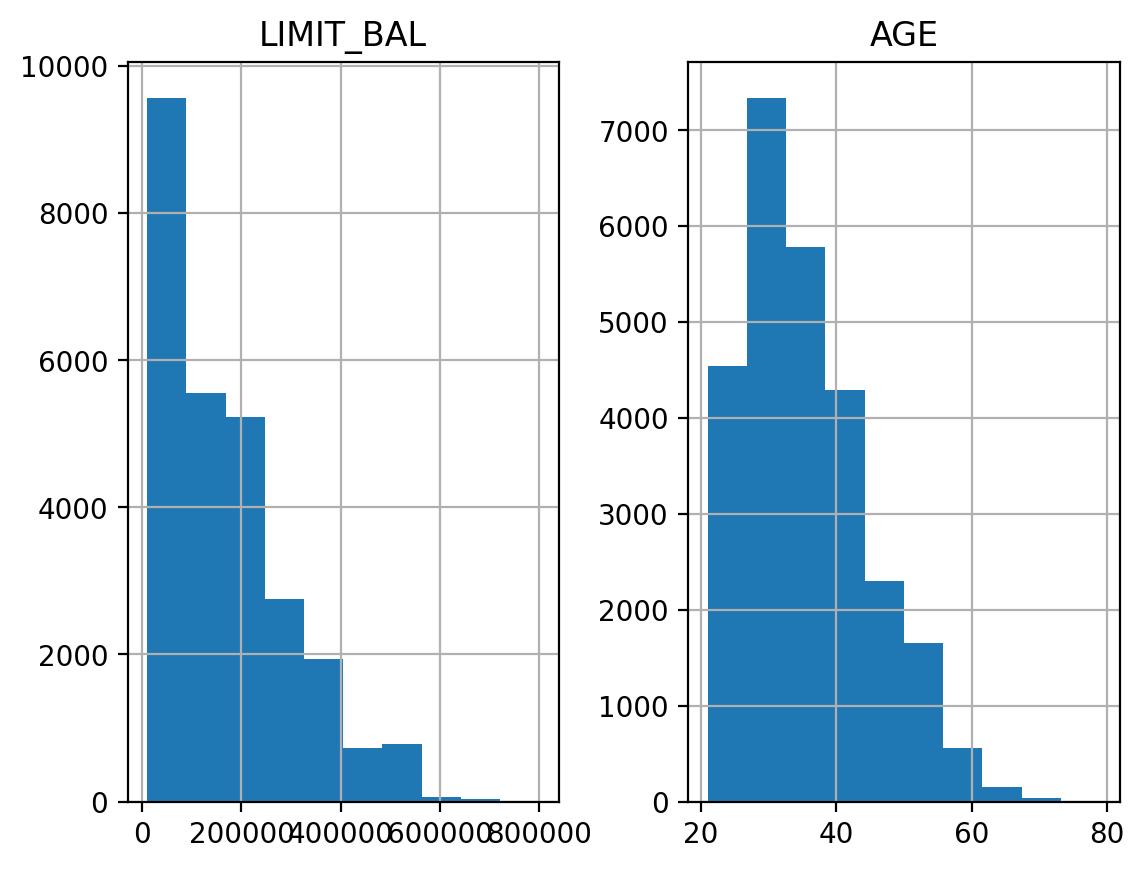

In [75]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [76]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [77]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [78]:
# lump together 0,5, and 6 into the "others" category (i.e. as "4")
# inplace = True means the change will take place on the existing dataframe
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [79]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

In [80]:
# same idea replace 0 with 3 ("other")
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

## book errata

 * `f_clean_2` should be `df_clean_2`
 * `plot.ylabel` and `plot.xlabel` should be `plt.ylabel` and `plt.xlabel`

Text(0.5, 0, 'Education level: ordinal encoding')

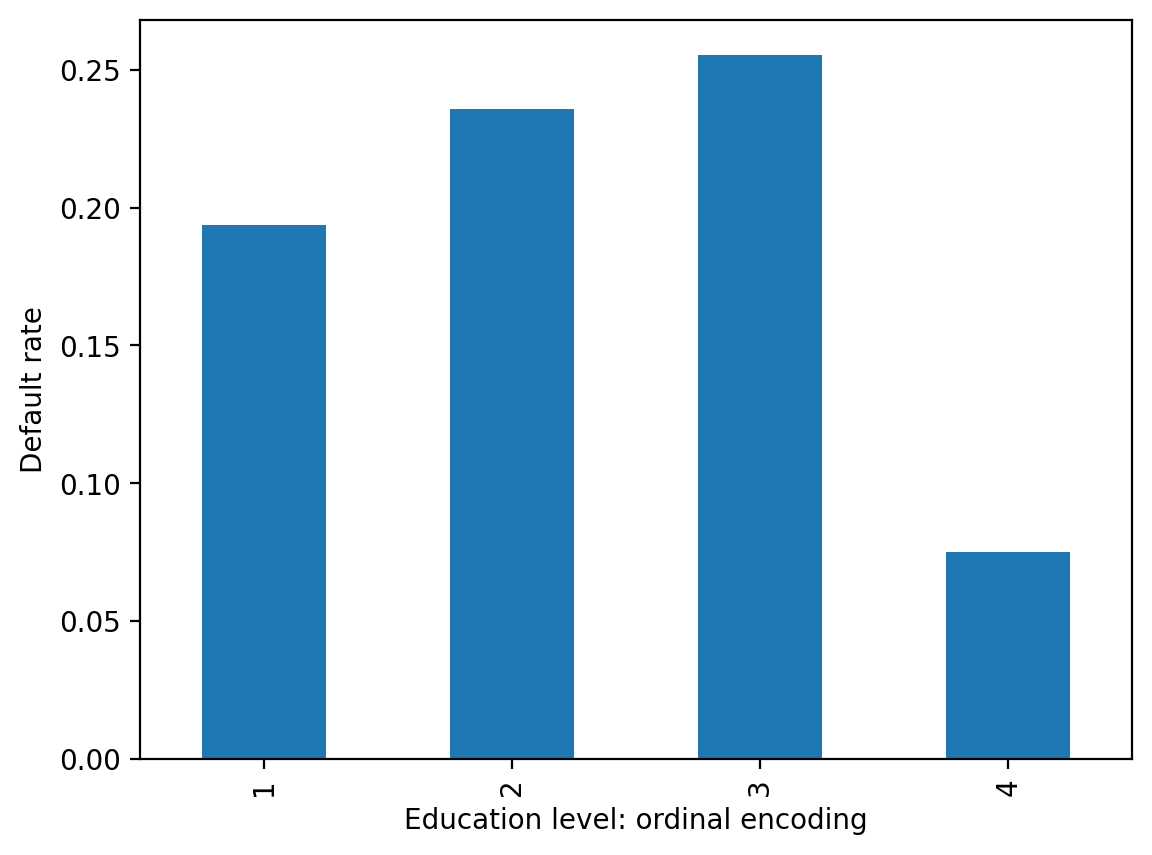

In [82]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [83]:
df_clean_2['EDUCATION_CAT'] = 'none' # creates blank column filled with a string that says 'none'
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(100)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
...,...,...
104,2,none
105,2,none
106,2,none
107,1,none


In [84]:
# create a mapping
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [87]:
# apply the mapping
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(20)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [88]:
# ohe = one-hot encode
# uses the get_dummies() function
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(20)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [90]:
# doing some joins (the book calls it concatenating)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT','graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,False,False,True,False
1,university,False,False,True,False
2,university,False,False,True,False
3,university,False,False,True,False
4,university,False,False,True,False
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,True,False
8,high school,False,True,False,False
9,high school,False,True,False,False


In [92]:
# write to a CSV
df_with_ohe.to_csv(r'C:\Users\Lappy\Data Science Projects with Python\00 data\ch01_cleaned_data.csv', index=False)

In [93]:
# loading the DataFrame we just saved!
df = pd.read_csv(r'C:\Users\Lappy\Data Science Projects with Python\00 data\ch01_cleaned_data.csv')

In [94]:
df.shape

(26664, 30)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [96]:
pay_feats = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [99]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [100]:
# how to sort by an index?
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

<Axes: >

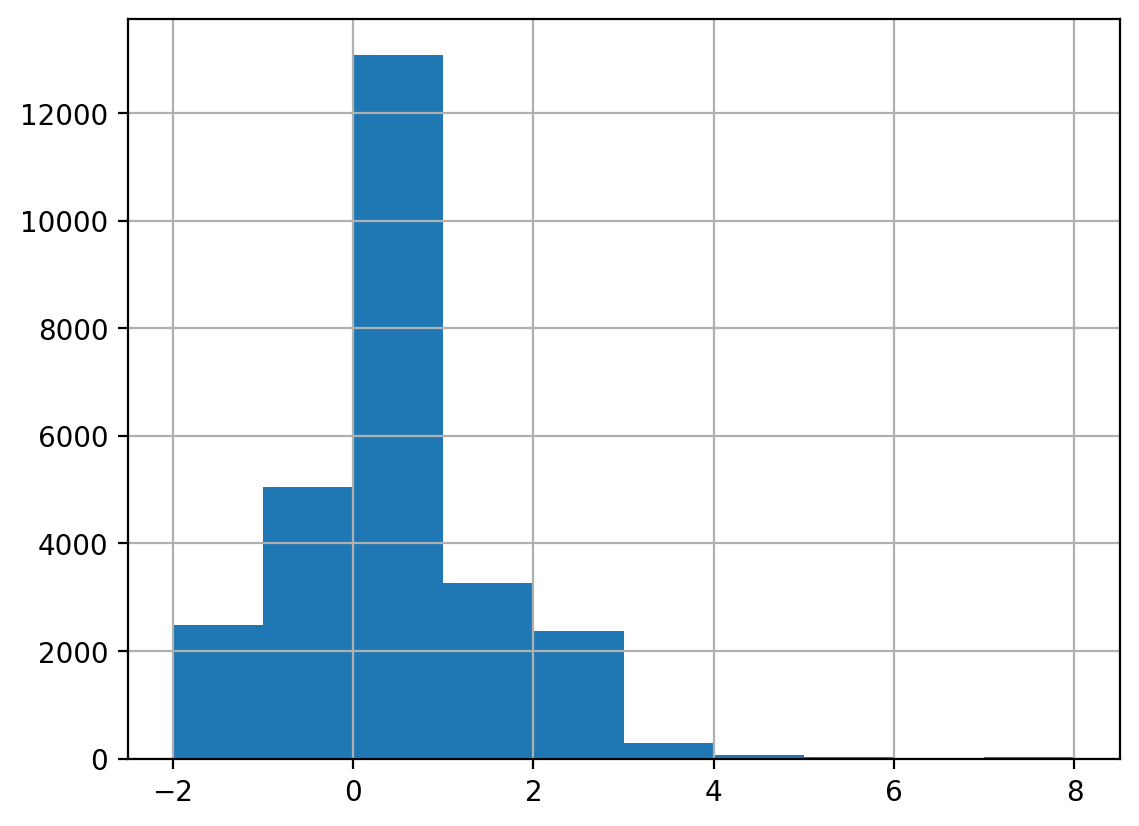

In [104]:
df[pay_feats[0]].hist()

In [106]:
# create an array of 12 numbers which will result in 11 bins
# -0.5 because boundaries are closed on the left, open on the right, except for very last bin [a,b)

pay_1_bins = np.array(range(-2,10)) -0.5 
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

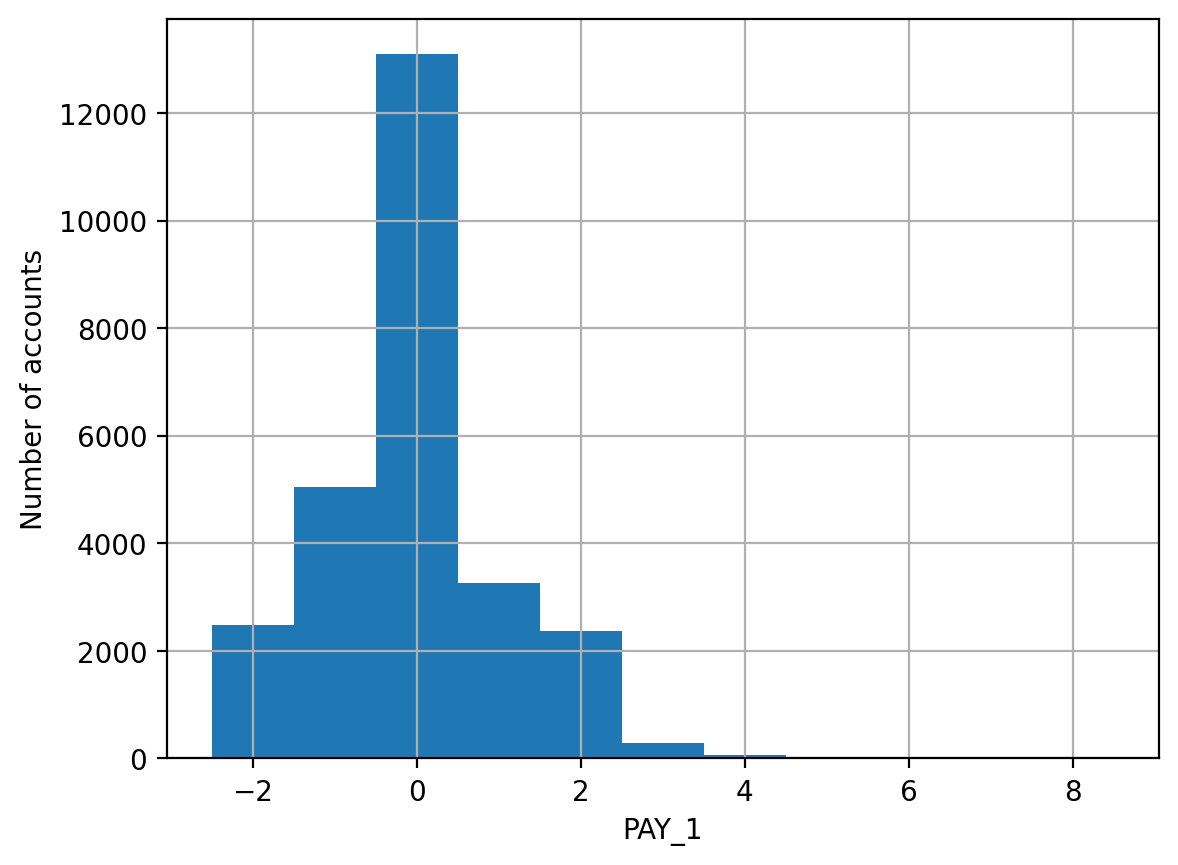

In [107]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

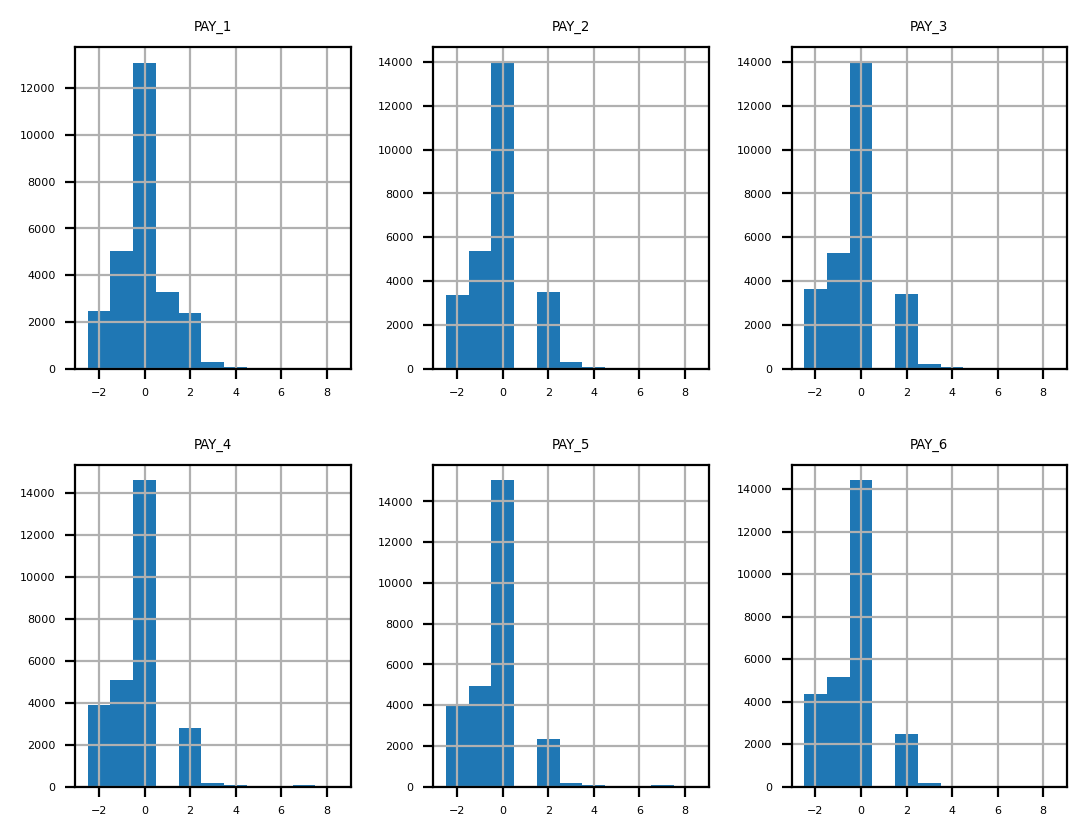

In [109]:
# time for small multiples!
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [111]:
# something is not right
# observe that N_2mo_delay_month_k+1 <= N_1mo_delay_month_k
# PAY_3 is July
# PAY_2 is August (from the data dictionary)

df.loc[df['PAY_2']==2, ['PAY_2','PAY_3']].head(20)

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2
50,2,0
57,2,2
61,2,2
82,2,0
83,2,2
